<a href="https://colab.research.google.com/github/khuloodnasher/Autism-Diagnosis/blob/master/Autism_Diagnosis_among_toddlers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

### Background
Autism spectrum disorder (ASD) is a type of neurological and developmental disorder that begins early in childhood and continues throughout a person's life. In this project, Dr. Fayez Thabtah collected data from 1054 toddlers whose ages were less than three years old. The Doctor asked their parents yes/no questions. These questions were behavioral questions and the number of yes were added up and have been recorded in the column called Q chat 10 question. If this column has more than 3 yes, toddlers will be classified as positive ASD.
### Our role in this project is to use machine learning techniques to diagnose ASD based on the Dr. Thabtah’s data.


Source of Data:

Fayez Thabtah

Department of Digital Technology
Manukau Institute of Technology 
Auckland, New Zeland

The columns are as follows:

### Q chat 10 question features with toddlers 

A1: Does your child look at you when you call his/her name?

A2: How easy is it for you to get eye contact with your child?

A3: Does your child point to indicate that s/he wants something?

A4: Does your child point to share an interest with you?

A5: Does your child pretend? e.g. care for dolls, talk on a toy phone?

A6: Does your child follow where you are looking?

A7: If you or someone else in the family is visibly upset, does your child show signs of waning to comfort them? e.g. stroking hair, hugging them)

A8: Would you describe your child's first word as:

A9: Does your child use simple gestures (e.g.wave goodbye)?

A10:Does your child stare at  nothing with no apparent purpose?







# Define The Problem 
Based on Quantitative Checklist for Autism in Toddlers (Q-CHAT) data provided by the ASD Tests app, we will try to develop a simple prediction model for toddlers to predict the probability of showing ASD traits so that their parents/guardians can consider taking steps early enough.

# Important Questions 

1-What is good algorithm to diagnose autism?

2- How can I improve my models’ accuracy?

3- What are the most  important features in diagnosing autism among children?



In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Functions to evaluate the model


In [3]:
### define our metrics function with plotting confusion matrix
import itertools
from sklearn.metrics import confusion_matrix 

### define function for plotting confusion matrix
def plot_confusion_matrix(y_true, y_preds):
    # Print confusion matrix
    cnf_matrix = confusion_matrix(y_true, y_preds)
    # Create the basic matrix
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues)
    # Add title and axis labels
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # Add appropriate axis scales
    class_names = set(y) # Get class labels to add to matrix
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=0)
    plt.yticks(tick_marks, class_names)
    # Add labels to each cell
    thresh = cnf_matrix.max() / 2. # Used for text coloring below
    # Here we iterate through the confusion matrix and append labels to our visualization
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, cnf_matrix[i, j],
                     horizontalalignment='center',
                     color='white' if cnf_matrix[i, j] > thresh else 'black')
    # Add a legend
    plt.colorbar();
    plt.show();
def metrics(model_name, y_train, y_test, y_hat_train, y_hat_test):
    '''Print out the evaluation metrics for a given models predictions'''
    print(f'Model: {model_name}', )
    print('-'*60)
    plot_confusion_matrix(y_test,y_hat_test)
    print(f'test accuracy: {round(accuracy_score(y_test, y_hat_test),2)}')
    print(f'train accuracy: {round(accuracy_score(y_train, y_hat_train),2)}')
    print('-'*60)
    print('-'*60)
    print('Confusion Matrix:\n', pd.crosstab(y_test, y_hat_test, rownames=['Actual'], colnames=['Predicted'],margins = True))
    print('\ntest report:\n' + classification_report(y_test, y_hat_test))
    print('~'*60)
    print('\ntrain report:\n' + classification_report(y_train, y_hat_train))
    print('-'*60)

# Function to draw the feature importances

In [4]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8, 8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

# Importing libraries

In [5]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supress warnings
import warnings
warnings.filterwarnings("ignore")

# Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis , QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier

# Regression
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV, ElasticNet, LogisticRegression
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor 
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

# Modelling Helpers :
from sklearn.preprocessing import Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV , KFold , cross_val_score, ShuffleSplit, cross_validate

# Preprocessing :
from sklearn.preprocessing import MinMaxScaler , StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

# Metrics :
# Regression
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error 
from sklearn.metrics import accuracy_score

# Classification
from sklearn.metrics import recall_score, f1_score, fbeta_score, r2_score, roc_auc_score, roc_curve, auc, cohen_kappa_score


## To display  all the interactive output without using the print function
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

print("Setup complete...")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Setup complete...


# Obtain Data

In [6]:
import pandas as pd
df=pd.read_csv('/content/drive/My Drive/Autism.csv')

print("Dataset loaded...")

Dataset loaded...


# Explore Data

In [7]:
df.info()
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
5,6,1,1,0,0,1,1,1,1,1,1,21,8,m,black,no,no,family member,Yes
6,7,1,0,0,1,1,1,0,0,1,0,33,5,m,asian,yes,no,family member,Yes
7,8,0,1,0,0,1,0,1,1,1,1,33,6,m,asian,yes,no,family member,Yes
8,9,0,0,0,0,0,0,1,0,0,1,36,2,m,asian,no,no,family member,No
9,10,1,1,1,0,1,1,0,1,1,1,22,8,m,south asian,no,no,Health Care Professional,Yes


# To know the dimension of our data

In [8]:
df.shape

(1054, 19)

## This project was collected over one tousand fifty four patients and 18 features were used

# collecting stastical info  about our data

In [9]:
df.describe()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
count,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000,1054.000000
mean,527.500000,0.563567,0.448767,0.401328,0.512334,0.524668,0.576850,0.649905,0.459203,0.489564,0.586338,27.867173,5.212524
std,304.407895,0.496178,0.497604,0.490400,0.500085,0.499628,0.494293,0.477226,0.498569,0.500128,0.492723,7.980354,2.907304
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000
25%,264.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.000000
50%,527.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,30.000000,5.000000
75%,790.750000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,8.000000
max,1054.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.000000,10.000000


### Displaying Columns

In [10]:
df.columns

Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

# Removing unwanted Coloumns

In [11]:
df.drop(['Case_No', 'Who completed the test'], axis = 1, inplace = True)
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Class/ASD Traits '],
      dtype='object')

# Calculating the percentage of babies shows the symptoms of autisim


In [12]:
# Calculating the percentage of babies shows the symptoms of autisim
data_yes= df[df['Class/ASD Traits ']=='Yes']
data_no= df[df['Class/ASD Traits ']=='No']

print("Toddlers:",len(data_yes)/len(df) * 100)
print("Toddlers:",len(data_yes)/len(df) * 100)



Toddlers: 69.07020872865274
Toddlers: 69.07020872865274


# Checking null data 

In [13]:
# Checking null data 
df.isnull().sum()

A1                     0
A2                     0
A3                     0
A4                     0
A5                     0
A6                     0
A7                     0
A8                     0
A9                     0
A10                    0
Age_Mons               0
Qchat-10-Score         0
Sex                    0
Ethnicity              0
Jaundice               0
Family_mem_with_ASD    0
Class/ASD Traits       0
dtype: int64

# Checking the type of the data 

In [14]:
df.dtypes

A1                      int64
A2                      int64
A3                      int64
A4                      int64
A5                      int64
A6                      int64
A7                      int64
A8                      int64
A9                      int64
A10                     int64
Age_Mons                int64
Qchat-10-Score          int64
Sex                    object
Ethnicity              object
Jaundice               object
Family_mem_with_ASD    object
Class/ASD Traits       object
dtype: object

## Investigating the correlation through plotting pearson method heatmap

<Figure size 1080x1080 with 0 Axes>

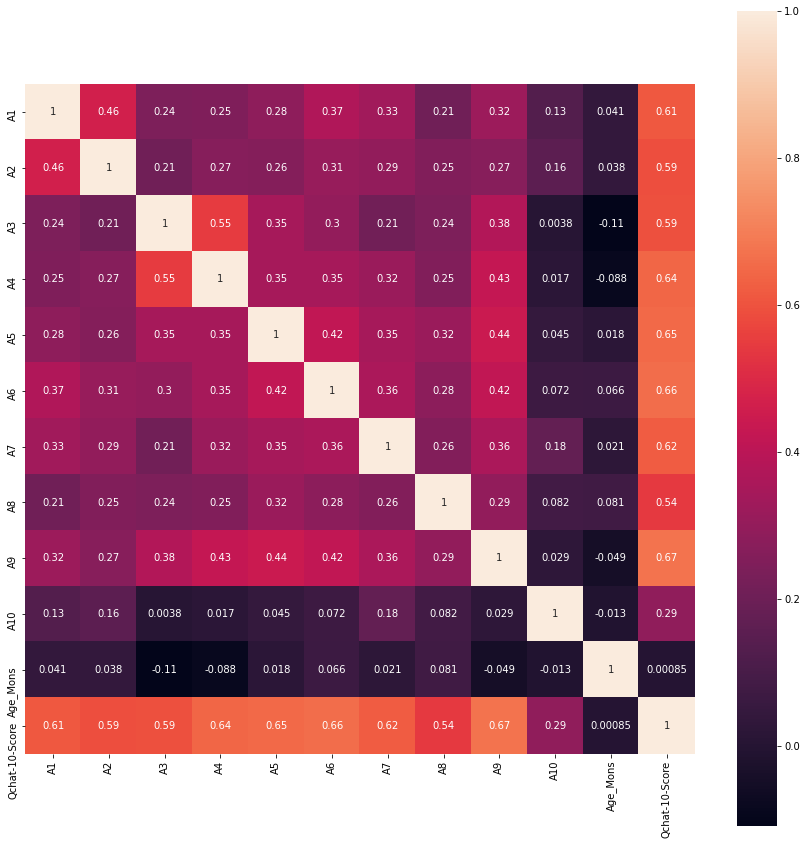

In [15]:
corr = df.corr( )
plt.figure(figsize = (15,15))
sns.heatmap(data = corr, annot = True, square = True, cbar = True)

# Interpreting the Heatmap of Correlation

The features in orange colour shows high correlation, we can see all the 10 answers from A1 to A9 except A10 are highly correlated with Qchart10-score. Therefore, it is better to remove the Qchat coloumn from our feature list because it is going to mislead our results.

###  Visualizing Juandice occurance in males and females

<Figure size 1152x576 with 0 Axes>

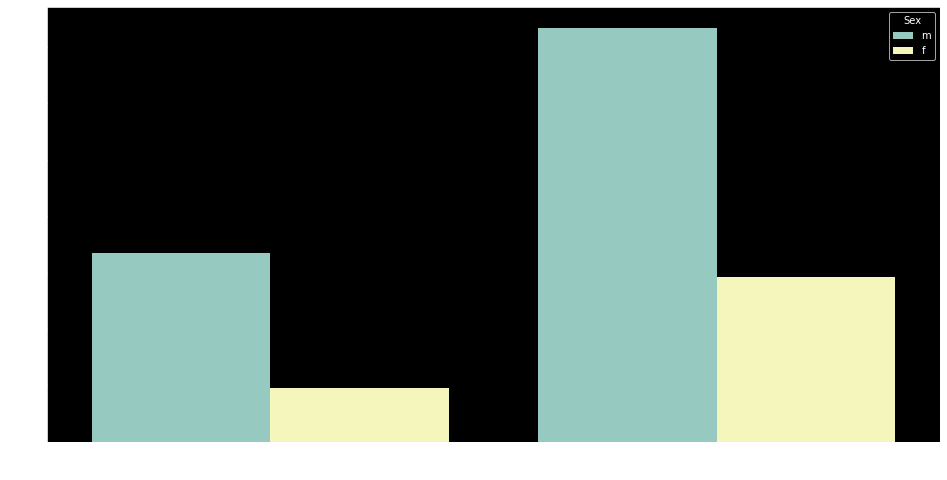

In [16]:
# Visualizing Juandice occurance in males and females
plt.figure(figsize = (16,8))

plt.style.use('dark_background')
sns.countplot(x = 'Jaundice', hue = 'Sex', data = data_yes)

### In Toddlers, jaundice is nearly 2 times in males than in  females. This sample studies shows that Jaundice is not connected to Autisim

# Visualizing The Q-chat 10 Score according to the gender

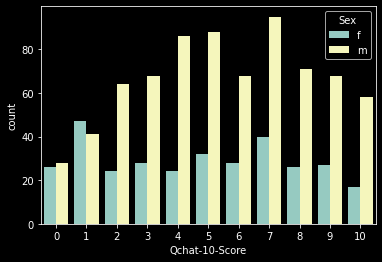

In [17]:
sns.countplot(x = 'Qchat-10-Score', hue = 'Sex', data = df)

# In general,Plot shows that the Qchat has more postive answers among males than females. That reflects males  are more postive to autisim than females.

#Visualizing  the age distribution of Positive ASD  among Todllers

Text(0.5, 0, 'Toddlers age in months')

Text(0.5, 1.0, 'Age distribution of ASD positive')

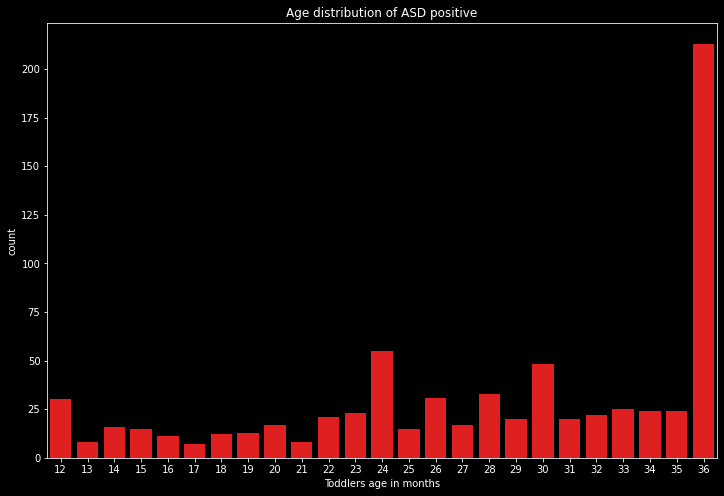

In [18]:
#Visualizing  the age distribution of Positive ASD  among Todllers


f, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x="Age_Mons", data=data_yes, color="r");

plt.style.use('dark_background')
ax.set_xlabel('Toddlers age in months')
ax.set_title('Age distribution of ASD positive')



# In age close to 36 months which is three years shows more positive autism.

# Explore Ethnicity

<Figure size 1152x576 with 0 Axes>

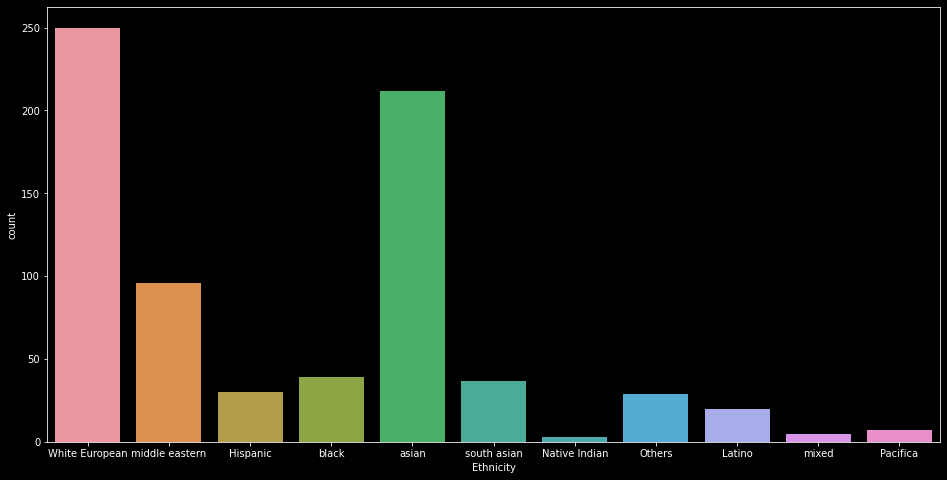

In [19]:
plt.figure(figsize = (16,8))
sns.countplot(x = 'Ethnicity', data = data_yes)

### White European ,Asian  then middle eastern are the most etnicity showed increase in autism cases.

#  visualize positive  ASD among Toddlers based on Ethnicity


<Figure size 1440x432 with 0 Axes>

Text(0.5, 1.0, 'Ethnicity Distribution of Positive ASD among Toddlers')

Text(0.5, 0, 'Ethnicity')

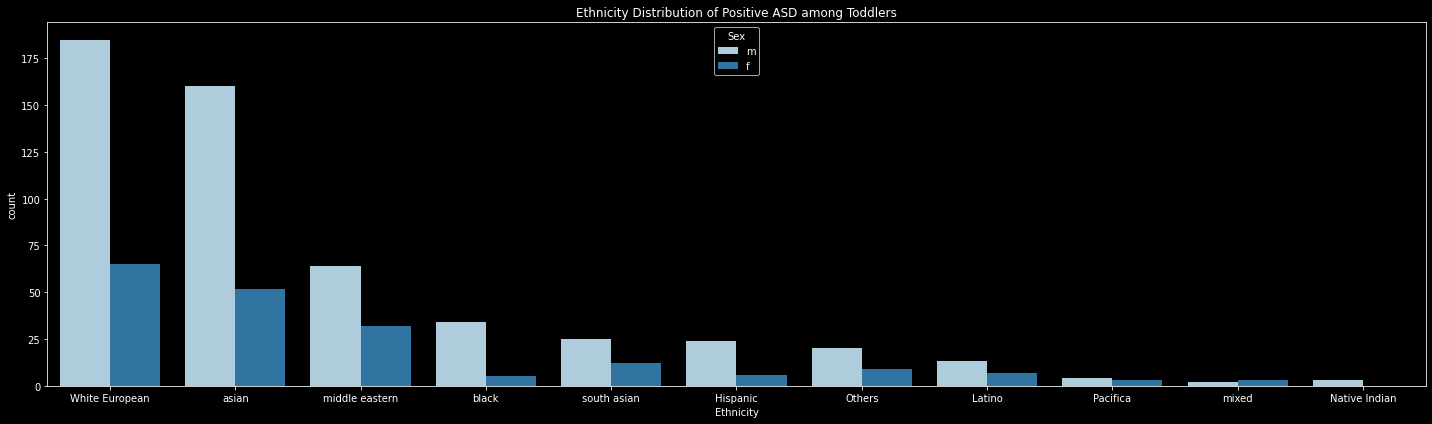

In [20]:
#  visualize positive  ASD among Toddlers based on Ethnicity
plt.figure(figsize=(20,6))
sns.countplot(x='Ethnicity',data=data_yes,order= data_yes['Ethnicity'].value_counts().index[:11],hue='Sex',palette='Paired')
plt.title('Ethnicity Distribution of Positive ASD among Toddlers')
plt.xlabel('Ethnicity')
plt.tight_layout()


### White European then Asian indeed are the most affected ethnicity. But we can notice that males have more  positive  autisim compared to females.



# Displaying number of positive cases of Autisim with Regards Ethnicity


In [21]:
# Displaying number of positive cases of Autisim with Regards Ethnicity
data_yes['Ethnicity'].value_counts()

White European    250
asian             212
middle eastern     96
black              39
south asian        37
Hispanic           30
Others             29
Latino             20
Pacifica            7
mixed               5
Native Indian       3
Name: Ethnicity, dtype: int64

### visualizing the distribution of autism in family within different ethnicity

Text(0.5, 1.0, 'Positive ASD Toddler relatives with Autism distribution for different ethnicities')

Text(0.5, 0, 'Toddler Relatives with ASD')

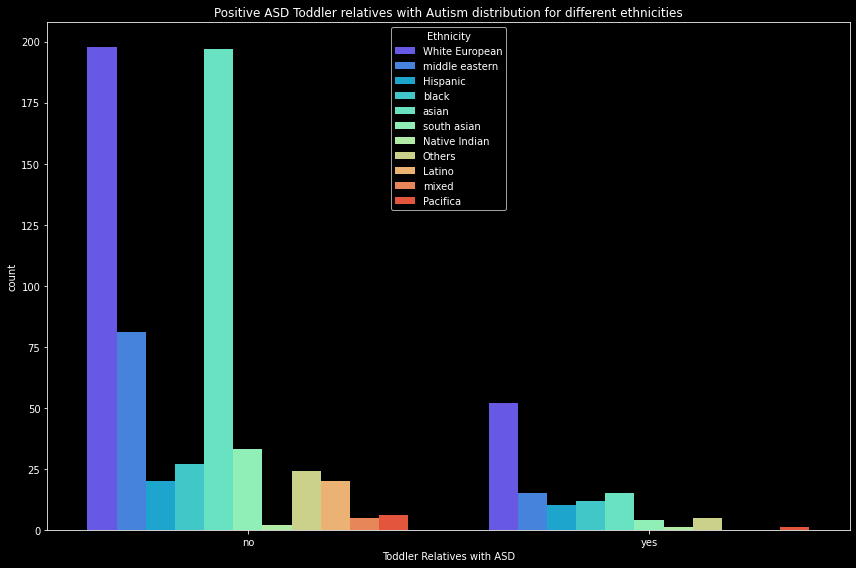

In [22]:
#Lets visualize the distribution of autism in family within different ethnicity
f, ax = plt.subplots(figsize=(12, 8))


sns.countplot(x='Family_mem_with_ASD',data=data_yes,hue='Ethnicity',palette='rainbow',ax=ax)
ax.set_title('Positive ASD Toddler relatives with Autism distribution for different ethnicities')
ax.set_xlabel('Toddler Relatives with ASD')
plt.tight_layout()




In general family history shows small effect in autisim.
However, we can see that  toddlers of White Europeans Ethnicities have very high chance of being ASD positive if they have it in their genes. Middle eastern and Asians follow the next though with smaller ratios.So We can somewhat conclude  that there is a genetic connect for ASD positive.

In [23]:
# removing 'Qchat-10-Score'
df.drop('Qchat-10-Score', axis = 1, inplace = True)

### Preprocessing features to get them ready for modeling through encoding caterogical features

In [24]:
le = LabelEncoder()
columns = ['Ethnicity', 'Family_mem_with_ASD', 'Class/ASD Traits ', 'Sex', 'Jaundice']
for col in columns:
    df[col] = le.fit_transform(df[col])
df.dtypes


A1                     int64
A2                     int64
A3                     int64
A4                     int64
A5                     int64
A6                     int64
A7                     int64
A8                     int64
A9                     int64
A10                    int64
Age_Mons               int64
Sex                    int64
Ethnicity              int64
Jaundice               int64
Family_mem_with_ASD    int64
Class/ASD Traits       int64
dtype: object

In [25]:
df.head(25)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,0,8,1,0,0
1,1,1,0,0,0,1,1,0,0,0,36,1,5,1,0,1
2,1,0,0,0,0,0,1,1,0,1,36,1,8,1,0,1
3,1,1,1,1,1,1,1,1,1,1,24,1,0,0,0,1
4,1,1,0,1,1,1,1,1,1,1,20,0,5,0,1,1
5,1,1,0,0,1,1,1,1,1,1,21,1,7,0,0,1
6,1,0,0,1,1,1,0,0,1,0,33,1,6,1,0,1
7,0,1,0,0,1,0,1,1,1,1,33,1,6,1,0,1
8,0,0,0,0,0,0,1,0,0,1,36,1,6,0,0,0
9,1,1,1,0,1,1,0,1,1,1,22,1,10,0,0,1


# Define X and y and split the data to training/testing, with test-size=40%

In [26]:
X = df.drop(['Class/ASD Traits '], axis = 1)
y = df['Class/ASD Traits ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state =42)
X.isnull().sum()
X.info()

A1                     0
A2                     0
A3                     0
A4                     0
A5                     0
A6                     0
A7                     0
A8                     0
A9                     0
A10                    0
Age_Mons               0
Sex                    0
Ethnicity              0
Jaundice               0
Family_mem_with_ASD    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   A1                   1054 non-null   int64
 1   A2                   1054 non-null   int64
 2   A3                   1054 non-null   int64
 3   A4                   1054 non-null   int64
 4   A5                   1054 non-null   int64
 5   A6                   1054 non-null   int64
 6   A7                   1054 non-null   int64
 7   A8                   1054 non-null   int64
 8   A9                   1054 non-null   int64
 9   A10                  1054 non-null   int64
 10  Age_Mons             1054 non-null   int64
 11  Sex                  1054 non-null   int64
 12  Ethnicity            1054 non-null   int64
 13  Jaundice             1054 non-null   int64
 14  Family_mem_with_ASD  1054 non-null   int64
dtypes: int64(15)
memory usage: 123.6 KB


# Modeling, I performed 10 models 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LR Accuracy Score is :  1.0
Model: LR
------------------------------------------------------------


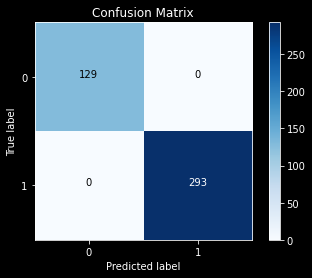

test accuracy: 1.0
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          129    0  129
1            0  293  293
All        129  293  422

test report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       293

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      1.00      1.00       435

    accuracy                           1.00       632
   macro avg       1.00      1.00      1.00       632
weight

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

LDA Accuracy Score is :  0.9597156398104265
Model: LDA
------------------------------------------------------------


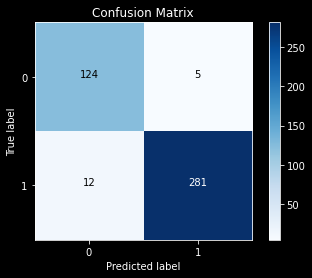

test accuracy: 0.96
train accuracy: 0.96
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          124    5  129
1           12  281  293
All        136  286  422

test report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       129
           1       0.98      0.96      0.97       293

    accuracy                           0.96       422
   macro avg       0.95      0.96      0.95       422
weighted avg       0.96      0.96      0.96       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       197
           1       0.99      0.95      0.97       435

    accuracy                           0.96       632
   macro avg       0.94      0.96      0.95       632
weig

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

KNN Accuracy Score is :  0.9146919431279621
Model: KNN
------------------------------------------------------------


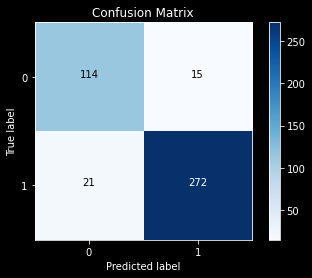

test accuracy: 0.91
train accuracy: 0.95
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          114   15  129
1           21  272  293
All        135  287  422

test report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       129
           1       0.95      0.93      0.94       293

    accuracy                           0.91       422
   macro avg       0.90      0.91      0.90       422
weighted avg       0.92      0.91      0.92       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.90      0.93      0.92       197
           1       0.97      0.95      0.96       435

    accuracy                           0.95       632
   macro avg       0.93      0.94      0.94       632
weig

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

CART Accuracy Score is :  0.9170616113744076
Model: CART
------------------------------------------------------------


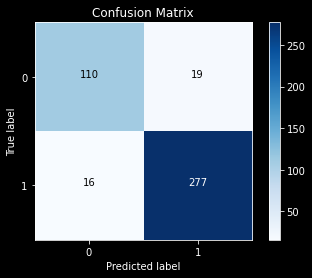

test accuracy: 0.92
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          110   19  129
1           16  277  293
All        126  296  422

test report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       129
           1       0.94      0.95      0.94       293

    accuracy                           0.92       422
   macro avg       0.90      0.90      0.90       422
weighted avg       0.92      0.92      0.92       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      1.00      1.00       435

    accuracy                           1.00       632
   macro avg       1.00      1.00      1.00       632
weigh

GaussianNB(priors=None, var_smoothing=1e-09)

NB Accuracy Score is :  0.9407582938388626
Model: NB
------------------------------------------------------------


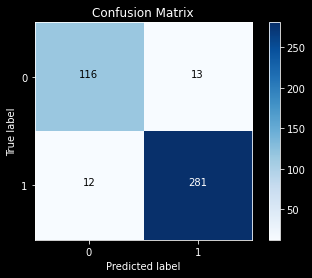

test accuracy: 0.94
train accuracy: 0.95
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          116   13  129
1           12  281  293
All        128  294  422

test report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       129
           1       0.96      0.96      0.96       293

    accuracy                           0.94       422
   macro avg       0.93      0.93      0.93       422
weighted avg       0.94      0.94      0.94       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       197
           1       0.97      0.97      0.97       435

    accuracy                           0.95       632
   macro avg       0.95      0.95      0.95       632
weig

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

SVM Accuracy Score is :  0.7796208530805687
Model: SVM
------------------------------------------------------------


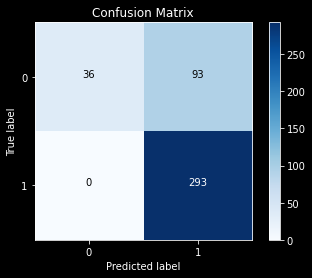

test accuracy: 0.78
train accuracy: 0.78
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted   0    1  All
Actual                 
0          36   93  129
1           0  293  293
All        36  386  422

test report:
              precision    recall  f1-score   support

           0       1.00      0.28      0.44       129
           1       0.76      1.00      0.86       293

    accuracy                           0.78       422
   macro avg       0.88      0.64      0.65       422
weighted avg       0.83      0.78      0.73       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      0.29      0.45       197
           1       0.76      1.00      0.86       435

    accuracy                           0.78       632
   macro avg       0.88      0.65      0.66       632
weighted 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

RF Accuracy Score is :  0.6563981042654028
Model: RF
------------------------------------------------------------


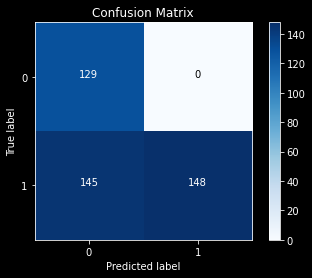

test accuracy: 0.66
train accuracy: 0.71
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          129    0  129
1          145  148  293
All        274  148  422

test report:
              precision    recall  f1-score   support

           0       0.47      1.00      0.64       129
           1       1.00      0.51      0.67       293

    accuracy                           0.66       422
   macro avg       0.74      0.75      0.66       422
weighted avg       0.84      0.66      0.66       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.52      1.00      0.68       197
           1       1.00      0.58      0.73       435

    accuracy                           0.71       632
   macro avg       0.76      0.79      0.71       632
weig

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

XGB Accuracy Score is :  0.9881516587677726
Model: XGB
------------------------------------------------------------


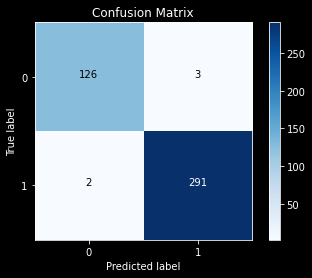

test accuracy: 0.99
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          126    3  129
1            2  291  293
All        128  294  422

test report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       129
           1       0.99      0.99      0.99       293

    accuracy                           0.99       422
   macro avg       0.99      0.98      0.99       422
weighted avg       0.99      0.99      0.99       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      1.00      1.00       435

    accuracy                           1.00       632
   macro avg       1.00      1.00      1.00       632
weigh

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

GBR Accuracy Score is :  0.6374407582938388
Model: GBR
------------------------------------------------------------


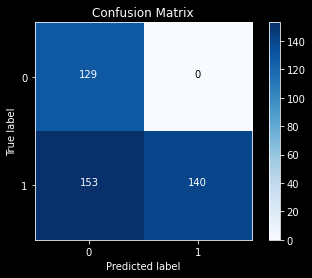

test accuracy: 0.64
train accuracy: 0.63
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          129    0  129
1          153  140  293
All        282  140  422

test report:
              precision    recall  f1-score   support

           0       0.46      1.00      0.63       129
           1       1.00      0.48      0.65       293

    accuracy                           0.64       422
   macro avg       0.73      0.74      0.64       422
weighted avg       0.83      0.64      0.64       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.46      1.00      0.63       197
           1       1.00      0.47      0.64       435

    accuracy                           0.63       632
   macro avg       0.73      0.73      0.63       632
weig

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

ABR Accuracy Score is :  0.5308056872037915
Model: ABR
------------------------------------------------------------


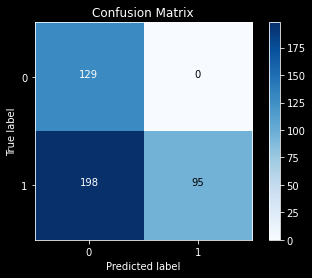

test accuracy: 0.53
train accuracy: 0.51
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0   1  All
Actual                 
0          129   0  129
1          198  95  293
All        327  95  422

test report:
              precision    recall  f1-score   support

           0       0.39      1.00      0.57       129
           1       1.00      0.32      0.49       293

    accuracy                           0.53       422
   macro avg       0.70      0.66      0.53       422
weighted avg       0.81      0.53      0.51       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.39      1.00      0.56       197
           1       1.00      0.29      0.45       435

    accuracy                           0.51       632
   macro avg       0.69      0.64      0.50       632
weighted 

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestRegressor()))
models.append(('XGB', XGBClassifier()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('ABR', AdaBoostRegressor()))

for name, model in models:
    model.fit(X_train, y_train)
    y_hat_test = model.predict(X_test).astype(int)
    y_hat_train = model.predict(X_train).astype(int)
    print(name, 'Accuracy Score is : ', accuracy_score(y_test, y_hat_test))

    metrics(name, y_train, y_test, y_hat_train, y_hat_test)


    
    

## Colecting the accuracy of every model

In [28]:
for name, model in models:
    
    y_hat_test = model.predict(X_test).astype(int)
    y_hat_train = model.predict(X_train).astype(int)
    print(name, 'Accuracy Score is : ',round( accuracy_score(y_test, y_hat_test),2))

LR Accuracy Score is :  1.0
LDA Accuracy Score is :  0.96
KNN Accuracy Score is :  0.91
CART Accuracy Score is :  0.92
NB Accuracy Score is :  0.94
SVM Accuracy Score is :  0.78
RF Accuracy Score is :  0.66
XGB Accuracy Score is :  0.99
GBR Accuracy Score is :  0.64
ABR Accuracy Score is :  0.53


# Interpreting the Results:
Logistic Regression model training and testing accuracy are 100%, Recall, Precision, F1score are 100% for both yes autism and no autism patients, FP, and False negative= Zero. Logistic Regression with default parameters is an ideal model.

LinearDiscriminantAnalysis has training and testing and Recall accuracy= 96% So LinearDiscriminantAnalysis is also a very good model.

KNN model has test accuracy: 0.91,train accuracy: 0.95, and weight average Recall = 91%.
so KNN is a good model.

The decision tree model has test accuracy: 0.91 and train accuracy: 1.0. This model has to be hyper tuned to adjust the overfitting, so it is not accepted.
NaieveBays model has test accuracy: 0.94, train accuracy: 0.95, and Weighted average Recall 94%, so naieve bayes is a good model.

The support vector machine and random forest have a low accuracy score before hyper tuned, so they are rejected.

XG Boosting has test accuracy: 0.99, train accuracy: 1.0, and Weighted average Recall for positive cases =99%, So XG Boosting is an ideal model ranked number#2 after Logistic Regression.

GradientBoosting and ADA Boosting have low accuracy, so they are rejected.
In summary, out of these 10 models, I will choose Logist Regression, and XG Boosting.

Now, We will try to hyper tune support vector machine using grid search without pipeline, then we will hyper tune random forest using grid-search with the pipeline,
additionally, we will model with a neural network through sikit learn, and Keras library.

# Tuning hyperparametres for SVC

In [29]:
svc = SVC()

params = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}

clf = GridSearchCV(svc, param_grid = params, scoring = 'accuracy', cv = 10, verbose = 2)

clf.fit(X_train, y_train)
clf.best_params_

Fitting 10 folds for each of 128 candidates, totalling 1280 fits
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.1, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=linear .................................
[CV] .......

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ..................... C=0.1, gamma=0.1, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=0.8, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.8, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.8, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.8, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.8, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.8, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.8, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.8, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.8, kernel=linear .................................
[CV] .................. C=0.1, gamma=0.8, kernel=linear, total=   0.0s
[CV] C=0.1, gamma=0.8, kernel=linear .................................
[CV] .

[Parallel(n_jobs=1)]: Done 1280 out of 1280 | elapsed:   17.9s finished


GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=2)

{'C': 0.8, 'gamma': 0.1, 'kernel': 'linear'}

# Re-running model with best parametres

SVC(C=0.8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Model: SVC(C=0.8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
------------------------------------------------------------


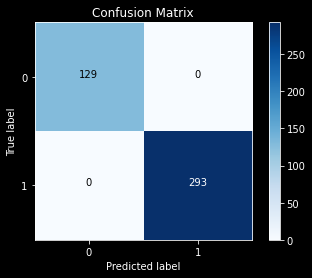

test accuracy: 1.0
train accuracy: 0.51
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          129    0  129
1            0  293  293
All        129  293  422

test report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00       293

    accuracy                           1.00       422
   macro avg       1.00      1.00      1.00       422
weighted avg       1.00      1.00      1.00       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.39      1.00      0.56       197
           1       1.00      0.29      0.45       435

    accuracy                           0.51       632
   macro avg       0.69      0.64      0.50       632
weigh

1.0

In [30]:
# Re-running model with best parametres
svc1 = SVC(C = 0.8, gamma = 0.1, kernel = 'linear')
svc1.fit(X_train, y_train)
y_hat_test = svc1.predict(X_test)
#print(accuracy_score(y_test, y_hat_test))
metrics(svc1, y_train, y_test, y_hat_train, y_hat_test)
svcgrid_test_acc = round(accuracy_score(y_test, y_hat_test), 2)

svcgrid_test_acc

### Support vector machine model after hypertunned by grid search ran into underfitting so this model is rejected.

## Random Forest( Grid search and pipeline )
Grid search algorithm is used to make exhaustive search of hyper parameters.

Pipeline is used to streamline the routine processes.


#Instantiate the pipeline

In [31]:

#Instantiate the pipeline
from sklearn.pipeline import Pipeline

pipe = Pipeline([('classifier', RandomForestClassifier(random_state=123))])


# Define the grid


In [32]:
grid = [{'classifier__criterion': ['gini', 'entropy'],
         'classifier__n_estimators':[10, 20, 50, 100],
         'classifier__max_depth': [None, 5, 3, 10],
         'classifier__min_samples_split': [1.0, 6, 10],
         'classifier__min_samples_leaf': [1,  6, 10],
         'classifier__class_weight':['balanced']}]

# Instantiate, fit and predict

In [33]:
clf = GridSearchCV(estimator=pipe, param_grid=grid,
                   cv=5, scoring='roc_auc', n_jobs=-1)
clf.fit(X_train, y_train)
y_hat_train = clf.predict(X_train)
y_hat_test = clf.predict(X_test)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('classifier',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                       

# Print evaluation metrics

Model: GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('classifier',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                

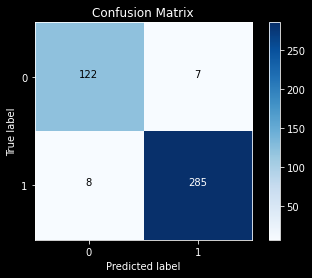

test accuracy: 0.96
train accuracy: 0.98
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          122    7  129
1            8  285  293
All        130  292  422

test report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       129
           1       0.98      0.97      0.97       293

    accuracy                           0.96       422
   macro avg       0.96      0.96      0.96       422
weighted avg       0.96      0.96      0.96       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       197
           1       1.00      0.97      0.99       435

    accuracy                           0.98       632
   macro avg       0.97      0.99      0.98       632
weig

In [34]:

metrics(clf, y_train, y_test, y_hat_train, y_hat_test)


# Best Scores

In [35]:
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

0.9998599684929109
0.9952377172791491


# Best Parameters¶

In [36]:
clf.best_params_

{'classifier__class_weight': 'balanced',
 'classifier__criterion': 'entropy',
 'classifier__max_depth': 10,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 10,
 'classifier__n_estimators': 100}

In [37]:
# Research best estimator from grid
best_clf_estimator = clf.best_estimator_
best_clf_estimator.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight='balanced',
                                        criterion='entropy', max_depth=10,
                                        max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1,
                                        min_samples_split=10,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=123,
                                        verbose=0, warm_start=False))],
         verbose=False)

Model: Pipeline(memory=None,
         steps=[('classifier',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight='balanced',
                                        criterion='entropy', max_depth=10,
                                        max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1,
                                        min_samples_split=10,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                                        oob_score=False, random_state=123,
                                        verbose=0, warm_start=False))],
         verbose=False)
-----------------------

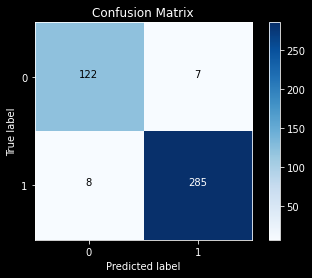

test accuracy: 0.96
train accuracy: 0.98
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          122    7  129
1            8  285  293
All        130  292  422

test report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       129
           1       0.98      0.97      0.97       293

    accuracy                           0.96       422
   macro avg       0.96      0.96      0.96       422
weighted avg       0.96      0.96      0.96       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       197
           1       1.00      0.97      0.99       435

    accuracy                           0.98       632
   macro avg       0.97      0.99      0.98       632
weig

0.96

In [38]:
#Predictions
y_hat_train=best_clf_estimator.predict(X_train)
y_hat_test = best_clf_estimator.predict(X_test)
results=metrics(best_clf_estimator, y_train, y_test, y_hat_train, y_hat_test)
rf_gridsearch_test_acc = round(accuracy_score(y_test,y_hat_test), 2)
rf_gridsearch_test_acc

# Precision-Recall Curve

# Interpreting the results of the second Random Forest model
 Random forest classifier before hyper tune Recall was 47% and after hyper tuning recall is 97%, also False-negative 156/422=37% before hyper tune but after hyper tune the false negative is only 8/422 = 0.02% meaning this model misclassifies only 0.02% and this is great mode.lWe have a weighted average recall and precision of 0.96 ain the test set. We don't have overfitting. It means we are able to detect the positive autism patient 96%.

We used pipelines to prevent data leakage and to have clean code.

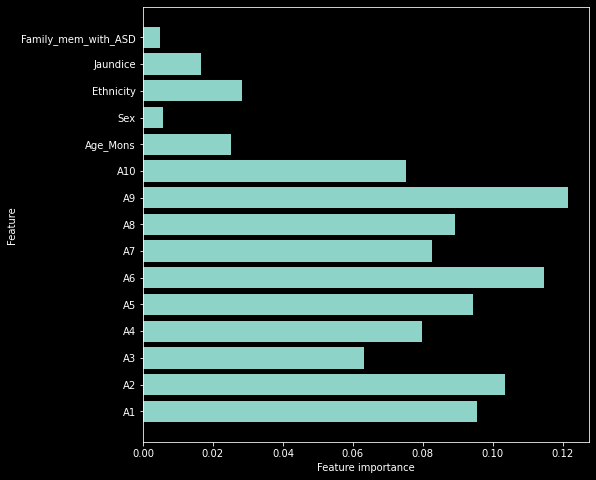

In [39]:
plot_feature_importances(model)

# A9 is the most important feature, other important features are A6, A5, and A8. Features named A are answers to the questions. If the patient answers yes to the question, the feature gets 1 for yes. As many 1 was in each column, The column got its importance. Ethnicity and age in months are important features, Jandice and the type of gender'sex' are less important features. Genes in this study which appear through the column of a family member with ASD is not an important feature, and that's actually against the worldwide studies. I can refer to the small size of the sample under study.

# Neural Network Classifier Using SKLearn

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 3), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=33, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

Model: MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100, 3), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=33, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
------------------------------------------------------------


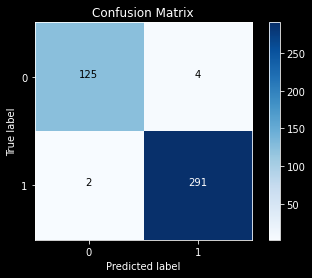

test accuracy: 0.99
train accuracy: 1.0
------------------------------------------------------------
------------------------------------------------------------
Confusion Matrix:
 Predicted    0    1  All
Actual                  
0          125    4  129
1            2  291  293
All        127  295  422

test report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       129
           1       0.99      0.99      0.99       293

    accuracy                           0.99       422
   macro avg       0.99      0.98      0.98       422
weighted avg       0.99      0.99      0.99       422

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

train report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       197
           1       1.00      1.00      1.00       435

    accuracy                           1.00       632
   macro avg       1.00      1.00      1.00       632
weigh

In [40]:
##Applying MLPClassifier Model 
from sklearn.neural_network import MLPClassifier
MLPClassifierModel = MLPClassifier(activation='tanh', # can be also identity , logistic , relu
                                   solver='lbfgs',  # can be also sgd , adam
                                   learning_rate='constant', # can be also invscaling , adaptive
                                   early_stopping= False,
                                   alpha=0.0001 ,hidden_layer_sizes=(100, 3),random_state=33)
MLPClassifierModel.fit(X_train, y_train)
#Calculating Prediction
y_hat_test = MLPClassifierModel.predict(X_test)
y_hat_train = MLPClassifierModel.predict(X_train)

results=metrics(MLPClassifierModel, y_train, y_test, y_hat_train, y_hat_test)

#Calculating Accuracy Score  
nn_sklearn_test_acc = round(accuracy_score(y_test, y_hat_test, normalize=True),2)

print('Accuracy Score is : ', nn_sklearn_test_acc)


Ths model is great based on train, test and recall accuracy, so I highly recommend it.


#Neural Network Classifier Using Keras Library

In [41]:
# Define simple neural network model
# Keras

from keras.models import Sequential
from keras.layers import *
from keras.optimizers import Adam, RMSprop





model = Sequential()
# Define Input Layer wits 15 features as an input
model.add(Dense(15, input_dim=15, activation='relu'))
#model.add(Dense(1, activation='sigmoid'))
#single output layer with one neuron since we only want to predict two classes either yes autisim =1 or no autisim=zero
model.add(Dense(activation = 'sigmoid', units = 1))


# Compile the Neural network
model.compile(loss='binary_crossentropy', # we use binarray here becuase we just have 2 classes
             optimizer = Adam(lr=0.0001, decay=1e-5), ### learning rate 0.0001
              metrics=['acc'])
# Fit to training data
model.fit(X_train, y_train, epochs=5,  
          validation_data=(X_test, y_test))

Epoch 1/5
20/20 [==============================] - 0s 10ms/step - loss: 2.2993 - acc: 0.6883 - val_loss: 2.2211 - val_acc: 0.6943
Epoch 2/5
20/20 [==============================] - 0s 3ms/step - loss: 2.2363 - acc: 0.6883 - val_loss: 2.1621 - val_acc: 0.6943
Epoch 3/5
20/20 [==============================] - 0s 3ms/step - loss: 2.1745 - acc: 0.6883 - val_loss: 2.1044 - val_acc: 0.6943
Epoch 4/5
20/20 [==============================] - 0s 4ms/step - loss: 2.1147 - acc: 0.6883 - val_loss: 2.0481 - val_acc: 0.6943
Epoch 5/5
20/20 [==============================] - 0s 4ms/step - loss: 2.0559 - acc: 0.6883 - val_loss: 1.9926 - val_acc: 0.6943


###  collecting the summary of our neural network paramters


In [42]:
# collecting the summary of our neural network paramters
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 15)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 16        
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


Number of Trainable parameters is 256 

### Plotting the architucture of neural net work

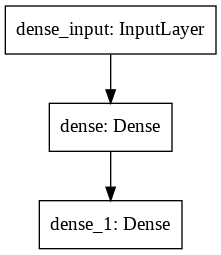

In [43]:
#structure of keras neuralnetwork model
from keras.utils import plot_model

plot_model(model)
# looking at the structure of my neural network

In [44]:
#Predictions

y_hat_test = model.predict_classes(X_test)


kerasNN_test_acc = round(accuracy_score(y_test,y_hat_test), 2)
kerasNN_test_acc


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


0.69

# Accuray Summary of Models:

In [45]:
# Create classifier summary table

LogisticRegression_Accuracy =  1.0
LinearDiscriminantAnalysis_accuracy  =  0.96
KNeighborsClassifier_accuracy =  0.91
DecisionTreeClassifier_accuracy =  0.91
GaussianNB_accuracy =  0.94
SVC_beforegrid_accuracy =  0.78
RandomForest_beforegrid_accuracy =  0.64
XGBClassifier_accuracy=  0.99
GradientBoosting_accuracy =  0.64,
AdaBoosting_accuracy = 0.49
SVC_aftergrid_accuracy = 1.0
RandomForest_aftergrid_accuracy =0.96
Neuralnetwork_SKLearn_accuracy= 0.99
Neuralnetwork_Keras_accuracy = 0.69



models=['LogisticRegression','LinearDiscriminantAnalysis',
       'KNeighborsClassifier','DecisionTreeClassifier',
        'GaussianNB','SVC_beforegrid',
        'RandomForest_beforegrid','XGBClassifier',
        'GradientBoosting','AdaBoosting','SVC_aftergrid','RandomForest_aftergrid','Neuralnetwork_SKLearn Accuracy','Neuralnetwork_Keras']


test_Accuracy=[1.0,0.96,0.91,0.91,0.94, 0.78,0.64, 0.99,0.64,0.49,1.0,0.96,0.99,0.69]




accuracy_summary = pd.DataFrame([models, test_Accuracy]).T
accuracy_summary.columns = ['Classifier', 'test_Accuracy']


# Accuracy Summary of the above 14 models

In [46]:
accuracy_summary

,Classifier,test_Accuracy
0,LogisticRegression,1
1,LinearDiscriminantAnalysis,0.96
2,KNeighborsClassifier,0.91
3,DecisionTreeClassifier,0.91
4,GaussianNB,0.94
5,SVC_beforegrid,0.78
6,RandomForest_beforegrid,0.64
7,XGBClassifier,0.99
8,GradientBoosting,0.64
9,AdaBoosting,0.49


# Conclusion

### Logistic Regression

Logistic Regresiom model training and testing accuracy are 100%,Recall,Precision,F1score are 100% for both yes autisim and no autisim patients, FP and False negative= Zero. 

### Logistic Regression with default parameters is an ideal model.

### LinearDiscriminantAnalysis 

LinearDiscriminantAnalysis has training and testing and Recall accuracy= 96% So LinearDiscriminantAnalysis is also very good model. 

### KNN model 

KNN model has test accuracy: 0.91,train accuracy: 0.95, and weight average Recall = 91% for positive cases , so KNN is good model. 

### Decsion tree model

Decsion tree model has test accuracy: 0.91 and train accuracy: 1.0. This model has to be hypertuned to adjust the overfitting, so it is not accepted.

### NaieveBays model

 NaieveBays model has test accuracy: 0.94,train accuracy: 0.95, and Weighted average Recall for positive cases =94%,so naieve bayes is a good model.

### Support vector machine and Random forest

Support vector machine and Random forest have low accuracy score before hypertunned, so they are rejected. 

### XG Boosting

XG Boosting has test accuracy: 0.99,train accuracy: 1.0,and Weighted average Recall for positive cases =99%, 

###So XG Boosting is an ideal model ranked number#2 after logistic Regression.

### GradientBoosting and ADA Boosting 

 GradientBoosting and ADA Boosting have low accuracy, so they are rejected. In summary out of these 10 models, I will choose Logist Regression, and XG Boosting.

### Support Vector Machine after hypertunned

Support Vector Machine after hypertuned through grid search with no pipeline used has test accuracy: 1.0 and train accuracy: 0.48. This model has underfitting and it is rejected.

### Random Forest  

Random forest classifier before hypertune Recall was 47% and after 

hypertuning recall is 97%, also False negative 156/422=37% before hypertune 

but after hypertune the false negative is only 8/422 = 0.02% meaning this 

model misclassifies only 0.02% and this is great mode. We have a weighted 

average recall and precision of 0.96.  It means we are able to detect the positive autisim patient with 96% accuracy which is a good accuracy. We don't have overfitting because test accuracy: 0.96 while the train accuracy: 0.98. 

### Neural Network Classifier Using SKLearn

Neural Network Classifier Using SKLearn has a test accuracy: 0.99 and train accuracy: 1.0, and Weighted average Recall =99%,

### so Neural Network Classifier Using SKLearn is an ideal model.




A9 is the most  important feature , A5,A6, are part of important features

We used gridsearch to find the best parameters.

We used pipeline to prrevent data leakage and to have clean code.


### Neural Network Classifier Using Keras Library
Accuracy is 69% so this model is rejected.



### In Conclusion
### Models
* Logistic Regression, XG Boosting and Neural Network are good models in our autism project with it small sample size.
### Important Features
* A9 is the most important features, other important features are A6, A5, and A8. Jandice and the type of gender'sex' are less important features. Genes in this study which appears through the column of family member with ASD is not an important feature
* Males are more positive to autism than females.
* Ages close to 36 months which is three years old show more positive autism.
* White European, Asian and middle eastern are the ethnicities that showed an increase in autism cases.






### Recommendation

- Apply Logistic Regression, XG Boosting or  neural network using sklearn for high accuracy model to diagnose Autisim.

- Diagnose  deeply and early autisim disease among particular ethnicity particularly  White European, Asian and middle East.

- Try to find more state of art in tracing autisim symptoms among toddlers in ages less than three years.

### Future Work
* Reach out the same clininc and get more data either with number of diagnosed patients or with more features used for diagnosis.

* Suggest to the main researcher to try numeric features as much as possible.

* Search other Autusim data around the world and do the same approch used in this project.


* Apply the same models on adults


*  Model with image data of cases daignosed with autisim using X-ray